# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
## NOTE - do not run this TWICE, it is randomly generating data

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
         
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Convert the city_data list to a pandas DataFrame
# city_data_df = pd.DataFrame(city_data)

# Save the DataFrame to a CSV file for future reference
# city_data_df.to_csv("output_data/city_weather_data.csv", index=False)

# Display the DataFrame with weather data for each city
# print(city_data_df.head())



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | hadibu
Processing Record 3 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 4 of Set 1 | nova sintra
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | al ghayzah
Processing Record 7 of Set 1 | laojunmiao
Processing Record 8 of Set 1 | minas de marcona
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | kharkhorin
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | manokwari
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | tolanaro
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kolondieba
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | keflavik
Processing Record 22 of S

Processing Record 39 of Set 4 | forked river
Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | al khawr
Processing Record 42 of Set 4 | albertina
Processing Record 43 of Set 4 | happy valley-goose bay
Processing Record 44 of Set 4 | fort bragg
Processing Record 45 of Set 4 | grand gaube
Processing Record 46 of Set 4 | puerto baquerizo moreno
Processing Record 47 of Set 4 | sao vicente
Processing Record 48 of Set 4 | vadso
Processing Record 49 of Set 4 | katsuura
Processing Record 0 of Set 5 | bangassou
Processing Record 1 of Set 5 | bongaigaon
Processing Record 2 of Set 5 | la'ie
Processing Record 3 of Set 5 | maryborough
Processing Record 4 of Set 5 | shanyang
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | tsiombe
Processing Record 7 of Set 5 | buncrana
Processing Record 8 of Set 5 | mahibadhoo
Processing Record 9 of Set 5 | ed damer
Processing Record 10 of Set 5 | jasidih
Processing Record 11 of Set 5 | velyka lepetykha
Processing

Processing Record 32 of Set 8 | roma
Processing Record 33 of Set 8 | mar del plata
Processing Record 34 of Set 8 | orosei
Processing Record 35 of Set 8 | santa maria do para
Processing Record 36 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | heinola
Processing Record 39 of Set 8 | tucupita
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | dunedin
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | la passe
Processing Record 44 of Set 8 | carbondale
Processing Record 45 of Set 8 | retford
Processing Record 46 of Set 8 | sao desiderio
Processing Record 47 of Set 8 | enid
Processing Record 48 of Set 8 | sirur
Processing Record 49 of Set 8 | kingscliff
Processing Record 0 of Set 9 | qamdo
Processing Record 1 of Set 9 | colonia
Processing Record 2 of Set 9 | merizo village
Processing Record 3 of Set 9 | susuman
Processing Record 4 of Set 9 | anamur
Processing Record 5 of Set 

Processing Record 19 of Set 12 | kavaratti
Processing Record 20 of Set 12 | alma
Processing Record 21 of Set 12 | north bend
Processing Record 22 of Set 12 | russellville
Processing Record 23 of Set 12 | tocoa
Processing Record 24 of Set 12 | sao joao da barra
Processing Record 25 of Set 12 | semenov
Processing Record 26 of Set 12 | araguaina
Processing Record 27 of Set 12 | itoman
Processing Record 28 of Set 12 | lungani
-----------------------------
Data Retrieval Complete
-----------------------------


In [16]:

# Convert the city_data list to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.shape[0]
print("Record Count:", record_count)

Record Count: 555


In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,36.99,78,100,30.94,TF,1690820969
1,hadibu,12.6500,54.0333,79.23,77,42,17.92,YE,1690820970
2,nova sintra,14.8667,-24.7167,74.93,79,70,4.79,CV,1690820970
3,tiksi,71.6872,128.8694,36.19,97,43,3.00,RU,1690820970
4,al ghayzah,16.2079,52.1760,79.56,88,36,14.07,YE,1690820971


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,36.99,78,100,30.94,TF,1690820969
1,hadibu,12.6500,54.0333,79.23,77,42,17.92,YE,1690820970
2,nova sintra,14.8667,-24.7167,74.93,79,70,4.79,CV,1690820970
3,tiksi,71.6872,128.8694,36.19,97,43,3.00,RU,1690820970
4,al ghayzah,16.2079,52.1760,79.56,88,36,14.07,YE,1690820971


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

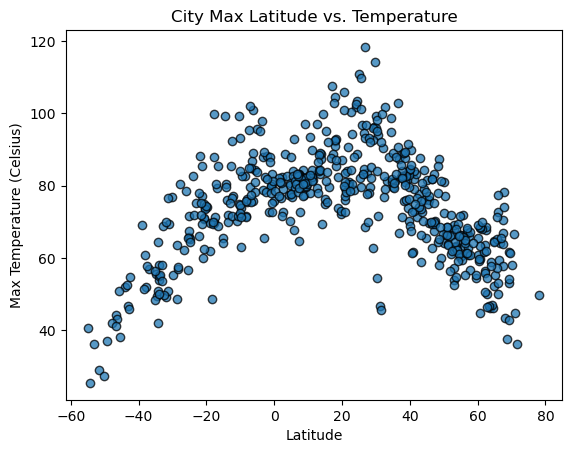

In [20]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

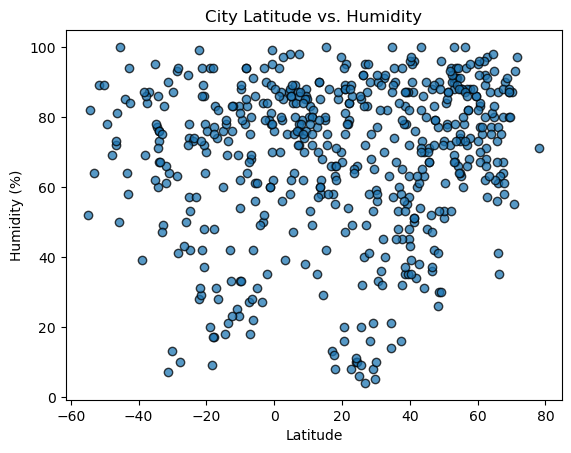

In [21]:

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

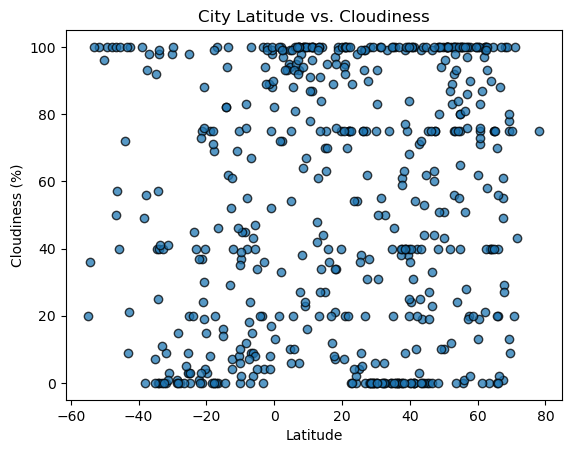

In [22]:

# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

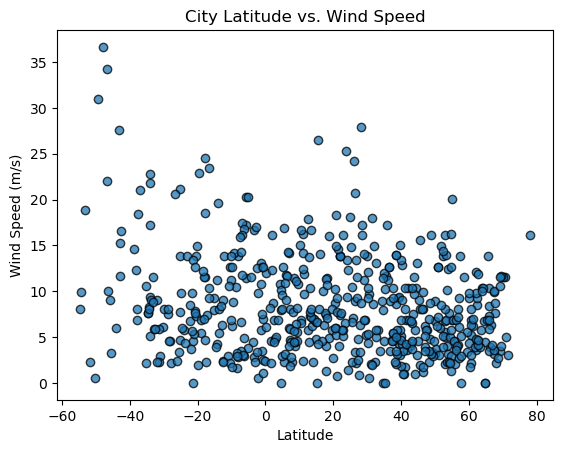

In [23]:

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

def plot_linear_regression(x_data, y_data, x_label, y_label, title, file_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create regression line data
    regression_line = slope * x_data + intercept
    
    # Create scatter plot
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_data, regression_line, color='red')
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Annotate the plot with regression equation and correlation coefficient
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_value_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, (min(x_data), max(y_data)), fontsize=12, color='red')
    plt.annotate(r_value_text, (min(x_data), max(y_data) - (max(y_data) - min(y_data)) * 0.1), fontsize=12, color='red')
    
    # Save the figure
    plt.savefig(file_name)
    
    # Show plot
    plt.show()


In [27]:
# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hadibu,12.6500,54.0333,79.23,77,42,17.92,YE,1690820970
2,nova sintra,14.8667,-24.7167,74.93,79,70,4.79,CV,1690820970
3,tiksi,71.6872,128.8694,36.19,97,43,3.00,RU,1690820970
4,al ghayzah,16.2079,52.1760,79.56,88,36,14.07,YE,1690820971
5,laojunmiao,39.8333,97.7333,70.25,45,84,15.08,CN,1690820971


In [28]:
# Create a DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,36.99,78,100,30.94,TF,1690820969
6,minas de marcona,-15.2119,-75.1103,65.62,60,16,9.31,PE,1690820971
7,blackmans bay,-43.0167,147.3167,46.72,58,9,15.21,AU,1690820971
8,souillac,-20.5167,57.5167,73.78,78,40,13.80,MU,1690820972
9,waitangi,-43.9535,-176.5597,51.82,85,72,5.99,NZ,1690820972


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6443


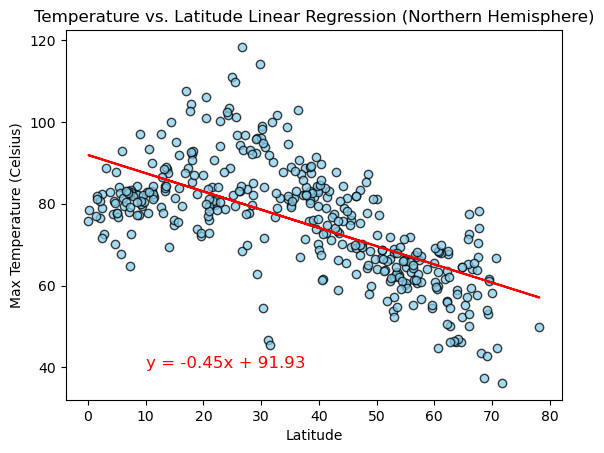

In [30]:

# Scatter plot for temperature vs. latitude in the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', edgecolors='black', facecolors='skyblue', alpha=0.75)

# Linear regression on Northern Hemisphere for temperature vs. latitude
slope, intercept, r_value, p_value, std_err = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate the regression line values
regression_values = northern_hemi_df['Lat'] * slope + intercept

# Plot the regression line in red
plt.plot(northern_hemi_df['Lat'], regression_values, color='red')

# Add the equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (10, 40), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Temperature vs. Latitude Linear Regression (Northern Hemisphere)')

# Show the R-value on the plot
plt.annotate(f"R-value = {r_value:.2f}", (10, 30), fontsize=12)

# Print the R-value
print(f"The r-value is: {r_value:.4f}")

# Save the figure
plt.savefig("output_data/Temperature_vs_Latitude_NorthernHemi.png")

# Show plot
plt.show()



**Discussion about the linear relationship:** 

Northern Hemisphere // Relationship between Latitude and Max Temperature Celsius:

The r-value is negative (-0.6443), indicating a moderately strong negative correlation between Latitude and Max Temperature Celsius in the Northern Hemisphere. As Latitude increases and moves farther away from the equator, Max Temperature Celsius tends to decrease.

In this equation ( y = -0.45x + 91.93 ), "y" represents the Max Temperature Celsius, and "x" represents the Latitude. The negative coefficient of Latitude (-0.45) suggests that as Latitude increases by one unit, Max Temperature Celsius tends to decrease by approximately 0.45 units. The intercept of 91.93 means that when Latitude is 0, the predicted Max Temperature Celsius is 91.93.

In summary, the data indicates that there is a:
-NEGATIVE correlation between Latitude and Max Temperature Celsius in the Northern Hemisphere. As one moves farther away from the Equator (i.e. Higher Latitude), the Temperature tends to Decrease.

The r-value is: 0.8238


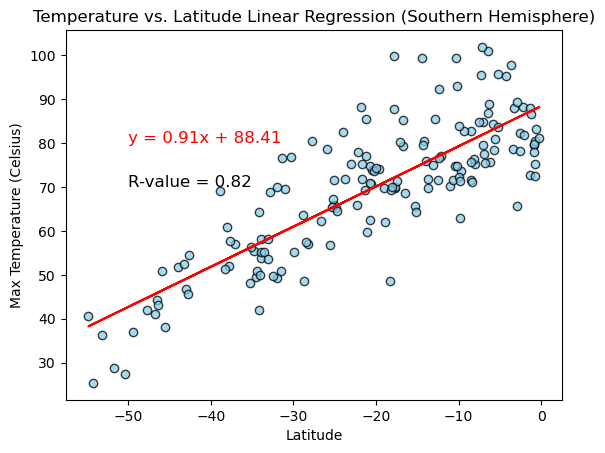

In [31]:

# Scatter plot for temperature vs. latitude in the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', edgecolors='black', facecolors='skyblue', alpha=0.75)

# Linear regression on Southern Hemisphere for temperature vs. latitude
slope, intercept, r_value, p_value, std_err = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate the regression line values
regression_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the regression line in red
plt.plot(southern_hemi_df['Lat'], regression_values, color='red')

# Add the equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (-50, 80), fontsize=12, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Temperature vs. Latitude Linear Regression (Southern Hemisphere)')

# Show the R-value on the plot
plt.annotate(f"R-value = {r_value:.2f}", (-50, 70), fontsize=12)

# Print the R-value
print(f"The r-value is: {r_value:.4f}")

# Save the figure
plt.savefig("output_data/Temperature_vs_Latitude_SouthernHemi.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

Southern Hemisphere // Relationship between Latitude and Max Temperature Celsius:

The r-value is positive (0.8238), indicating a moderately strong Positive Correlation between Latitude and Max Temperature Celsius in the Southern Hemisphere. As Latitude increases and moves closer to the equator, Max Temperature Celsius also tends to increase.

In this equation ( y = 0.91x + 88.41 ), "y" represents the Max Temperature Celsius, and "x" represents the Latitude. The positive coefficient of Latitude (0.91) suggests as Latitude increases by one unit, Max Temperature Celsius tends to increase by approximately 0.91 units. The intercept of 88.41 means that when Latitude is 0, the predicted Max Temperature Celsius is 88.41.

In summary, the data indicates that there is a:
-POSITIVE correlation between Latitude and Max Temperature Celsius in the Southern Hemisphere. As one moves closer to the Equator (i.e. Lower Latitude), the Temperature tends to Increase.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1061


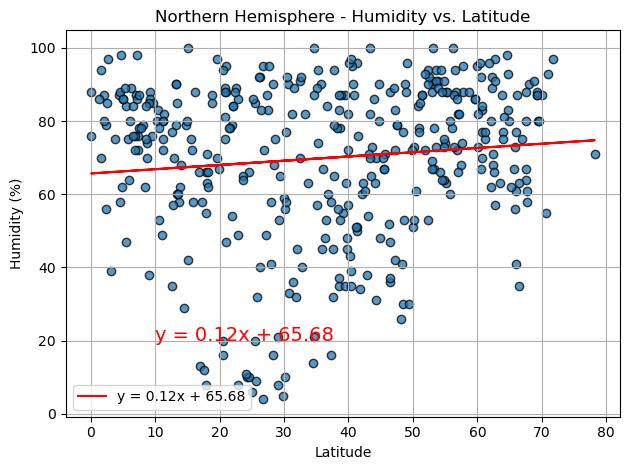

In [33]:

# Create a scatter plot for Humidity vs. Latitude in the Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Add the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label=line_eq)

# Print the R-value
print(f"The r-value is: {r_value:.4f}")

# Add the equation to the plot
plt.annotate(line_eq, (10, 20), fontsize=14, color="red")

# Show the plot
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


**Discussion about the linear relationship:** 

Northern Hemisphere // Relationship between Latitude and Humidity:

The r-value is positive but very close to zero (0.1061), indicating a very weak positive correlation between Latitude and Humidity in the Northern Hemisphere. As Latitude increases, there is a slight tendency for Humidity to increase, but the correlation is not strong.

In this equation ( y = 0.12x + 65.68 ), "y" represents the Humidity, and "x" represents the Latitude. The positive coefficient of Latitude (0.12) suggests that as Latitude increases by one unit, Humidity tends to increase by approximately 0.12 units. The intercept of 65.68 means that when Latitude is 0, the predicted Humidity is 65.68.

In summary, the data indicates that there is a:
-VERY WEAK POSITIVE correlation between Latitude and Humidity in the Northern Hemisphere. As Latitude increases, Humidity tends to slightly increase, but the relationship is not strong.

The r-value is: 0.0002808747046324607


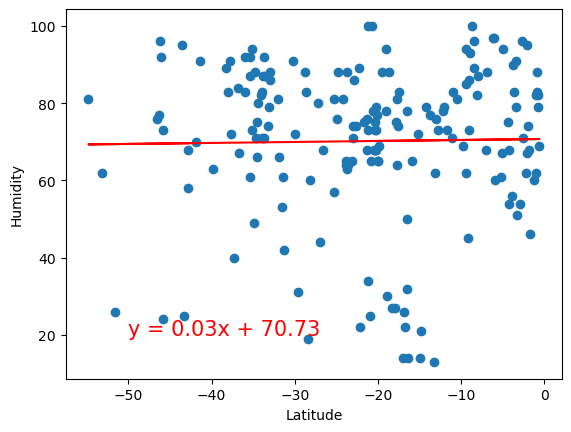

In [18]:

# Create a scatter plot for Humidity vs. Latitude in the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='black')

# Perform linear regression on Humidity vs. Latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create the equation for the trendline
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Plot the trendline
plt.plot(southern_hemi_df['Lat'], regress_values, 'r-')

# Add the equation to the plot
plt.annotate(equation, (-50, 20), fontsize=15, color='red')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print the r-value
print(f'The r-value is: {r_value:.4f}')

# Show the plot
plt.show()


**Discussion about the linear relationship:** 

Southern Hemisphere // Relationship between Latitude and Humidity:

The r-value is very close to zero (0.0002808747046324607), indicating a very weak and almost negligible correlation between Latitude and Humidity in the Southern Hemisphere. As Latitude changes in the Southern Hemisphere, there is almost no noticeable effect on Humidity.

In this equation ( y = 0.03x + 70.73 ), "y" represents the Humidity, and "x" represents the Latitude. The positive coefficient of Latitude (0.03) suggests that as Latitude increases by one unit, Humidity tends to increase by an extremely small value of approximately 0.03 units. The intercept of 70.73 means that when Latitude is 0, the predicted Humidity is 70.73.

In summary, the data indicates that there is a:
-VERY WEAK correlation between Latitude and Humidity in the Southern Hemisphere. Latitude has almost no impact on Humidity levels in this region.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0599


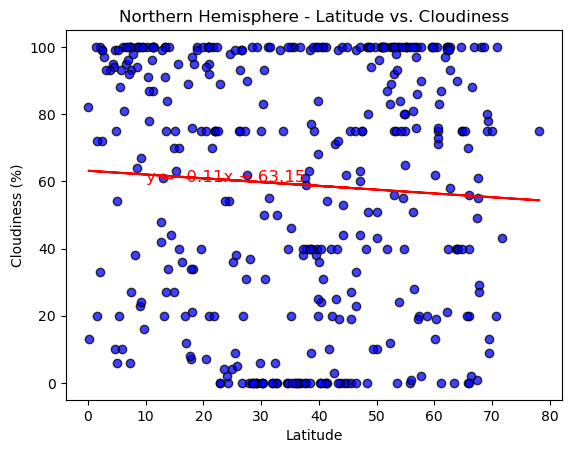

In [34]:
# Calculate linear regression for cloudiness vs latitude in the Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Create equation of the trendline
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add the trendline
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")

# Add the equation to the plot
plt.annotate(equation, (10, 60), fontsize=12, color="red")

# Print the r-value
print(f"The r-value is: {r_value:.4f}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

Northern Hemisphere // Relationship between Latitude and Cloudiness:

The r-value is close to zero (-0.0599), indicating a very weak negative correlation between Latitude and Cloudiness in the Northern Hemisphere. The data suggests that there is almost no meaningful relationship between these two variables. As Latitude increases or decreases, there is no significant pattern in how Cloudiness changes.

In this equation ( y = -0.11x + 63.15 ), "y" represents the Cloudiness percentage, and "x" represents the Latitude. The negative coefficient of Latitude (-0.11) suggests a slight negative slope, but it is almost negligible. This means that as Latitude increases by one unit, Cloudiness tends to decrease by approximately 0.11 units, but this decrease is very slight. The intercept of 63.15 means that when Latitude is 0, the predicted Cloudiness percentage is 63.15.

In summary, the data indicates that there is:
-VERY WEAK negative correlation between Latitude and Cloudiness in the Northern Hemisphere. The Cloudiness does not show a clear trend with changing Latitude values.

The r-value is: -0.0794


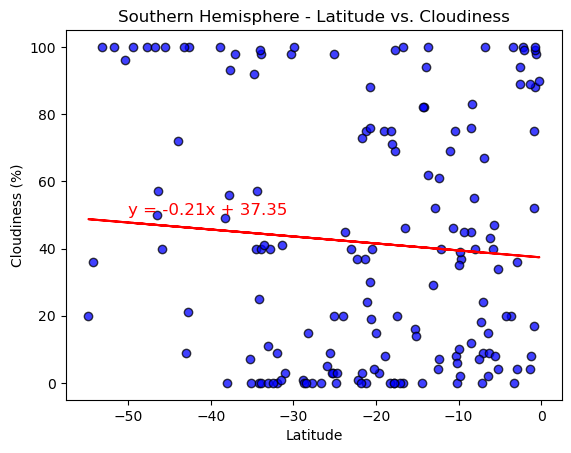

In [36]:
# Calculate linear regression for cloudiness vs latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Create equation of the trendline
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add the trendline
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")

# Add the equation to the plot
plt.annotate(equation, (-50, 50), fontsize=12, color="red")

# Print the r-value
print(f"The r-value is: {r_value:.4f}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()



**Discussion about the linear relationship:** 

Southern Hemisphere // Relationship between Latitude and Cloudiness:

The r-value is close to zero (-0.0794), indicating a very weak negative correlation between Latitude and Cloudiness in the Southern Hemisphere. The data suggests that there is almost no meaningful relationship between these two variables. As Latitude increases or decreases, there is no significant pattern in how Cloudiness changes.

In this equation ( y = -0.21x + 37.35 ), "y" represents the Cloudiness percentage, and "x" represents the Latitude. The negative coefficient of Latitude (-0.21) suggests a slight negative slope, but it is almost negligible. This means that as Latitude increases by one unit, Cloudiness tends to decrease by approximately 0.21 units, but this decrease is very slight. The intercept of 37.35 means that when Latitude is 0, the predicted Cloudiness percentage is 37.35.

In summary, the data indicates that there is:
-VERY WEAK negative correlation between Latitude and Cloudiness in the Southern Hemisphere. The Cloudiness does not show a clear trend with changing Latitude values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1520


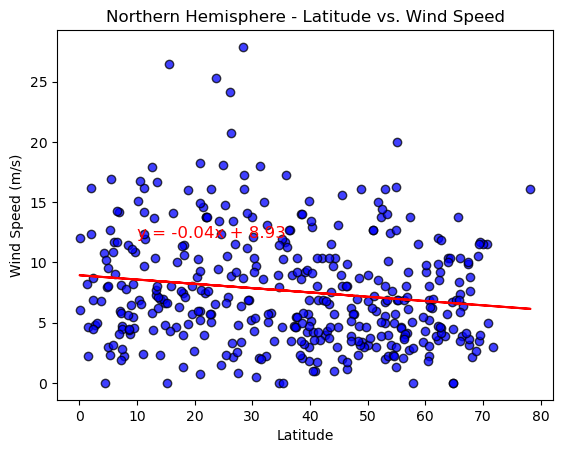

In [37]:
# Calculate linear regression for wind speed vs latitude in the Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Create equation of the trendline
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add the trendline
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")

# Add the equation to the plot
plt.annotate(equation, (10, 12), fontsize=12, color="red")

# Print the r-value
print(f"The r-value is: {r_value:.4f}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

Northern Hemisphere // Relationship between Latitude and Wind Speed:

The r-value is negative (-0.1520), indicating a weak negative correlation between Latitude and Wind Speed in the Northern Hemisphere. The data suggests that there is a slight decreasing trend in Wind Speed as Latitude increases.

In this equation ( y = -0.04x + 8.93 ), "y" represents the Wind Speed in meters per second, and "x" represents the Latitude. The negative coefficient of Latitude (-0.04) suggests that as Latitude increases by one unit, Wind Speed tends to decrease by approximately 0.04 units. The intercept of 8.93 means that when Latitude is 0, the predicted Wind Speed is 8.93 m/s.

In summary, the data indicates that there is:
-A WEAK negative correlation between Latitude and Wind Speed in the Northern Hemisphere. As one moves away from the Equator (i.e., higher Latitude), the Wind Speed tends to decrease slightly.

The r-value is: -0.2182


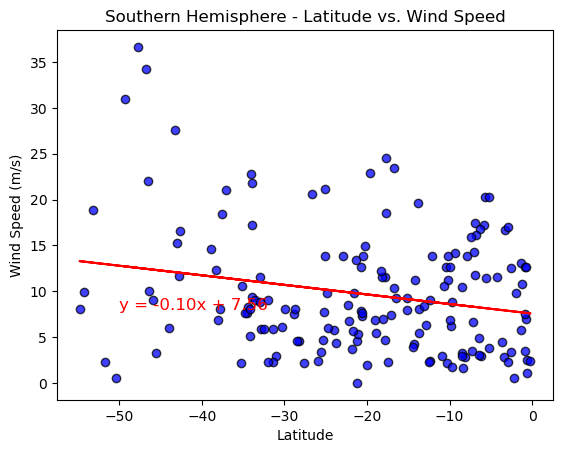

In [38]:
# Calculate linear regression for wind speed vs latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Create equation of the trendline
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add the trendline
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")

# Add the equation to the plot
plt.annotate(equation, (-50, 8), fontsize=12, color="red")

# Print the r-value
print(f"The r-value is: {r_value:.4f}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

Southern Hemisphere // Relationship between Latitude and Wind Speed:

The r-value is negative (-0.2182), indicating a weak negative correlation between Latitude and Wind Speed in the Southern Hemisphere. The data suggests that there is a slight tendency for Wind Speed to decrease slightly as Latitude increases in the Southern Hemisphere.

In this equation ( y = -0.10x + 7.56 ), "y" represents the Wind Speed in meters per second, and "x" represents the Latitude. The negative coefficient of Latitude (-0.10) suggests a slight negative slope, meaning that as Latitude increases by one unit, Wind Speed tends to decrease by approximately 0.10 m/s, but this decrease is relatively small. The intercept of 7.56 means that when Latitude is 0, the predicted Wind Speed is 7.56 m/s.

In summary, the data indicates that there is:
-A WEAK negative correlation between Latitude and Wind Speed in the Southern Hemisphere. As one moves closer to the Equator (i.e., Lower Latitude), there is a slight tendency for Wind Speed to decrease slightly. However, the correlation is weak, and Latitude alone does not explain much of the variability in Wind Speed in the Southern Hemisphere.